In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("adult_with_headers.csv")

# 1. Data Exploration and Preprocessing:

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

# Since we have only 2 unique values in the income columns that means it is a classification dataset 
now work according to the classification model 
there are many classification algorithm
1:logistic Regression model
2: Decission Treee 
3: Random Forest Classsifier
4: Support Vector Classifier
    etc

In [8]:
min_max=df.copy()

In [9]:
min_max

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling


In [10]:
# first find the numerical columns
numerical=[]
categorical=[]
for col in min_max.columns:
    if min_max[col].dtypes == 'int64':
        numerical.append(col)
    else:
        categorical.append(col)
        

In [11]:
# This are the numerical columns to apply
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [12]:
for i in numerical:
    print(f"unique values of {i} is {min_max[i].unique()}")

unique values of age is [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
unique values of fnlwgt is [ 77516  83311 215646 ...  34066  84661 257302]
unique values of education_num is [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
unique values of capital_gain is [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508 

In [13]:
# Required Library
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
X=min_max.drop(categorical,axis=1)

In [15]:
X.nunique()

age                  73
fnlwgt            21648
education_num        16
capital_gain        119
capital_loss         92
hours_per_week       94
dtype: int64

In [16]:
Y=min_max['income']

In [17]:
Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [18]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

# min _max_scaler

When to Use:
Useful for algorithms that rely on distances (e.g., Euclidean) or gradients.
Works well when data has a uniform distribution and no extreme outliers.


Suitable for algorithms like:
K-Nearest Neighbors (KNN)
Support Vector Machines (SVMs)
Neural Networks


Why:
It ensures all features contribute equally to the model, preventing features with larger scales from dominating.

In [19]:
#min_max_scaler
min_max_scaler=MinMaxScaler(feature_range=(0,1))
X_train=min_max_scaler.fit_transform(X_train)
print(X_train)

[[0.21917808 0.12625338 0.8        0.         0.         0.5       ]
 [0.26027397 0.05037557 0.66666667 0.         0.43319559 0.5       ]
 [0.56164384 0.12955135 0.26666667 0.         0.         0.39795918]
 ...
 [0.01369863 0.13854675 0.4        0.         0.         0.19387755]
 [0.45205479 0.02850817 0.53333333 0.         0.         0.84693878]
 [0.23287671 0.07835129 0.8        0.         0.         0.60204082]]


# Standar Scaler
Range: Data is scaled to have a mean of 0 and a standard deviation of 1.

When to Use:
Useful for algorithms that assume data is Gaussian (normally distributed).
Works well with algorithms that rely on statistical properties of data.

Suitable for algorithms like:
Logistic Regression
Linear Regression
Principal Component Analysis (PCA)
Gradient Descent-based models (e.g., deep learning)

Why:
It centers the data and removes the effects of mean and variance, ensuring uniformity across features.

In [20]:
# Standarization 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.40875606,  0.08005085,  1.13370219, -0.14571521, -0.21799808,
         0.77946024],
       [-0.1888573 , -0.98165286,  0.35704925, -0.14571521,  4.45716784,
         0.77946024],
       [ 1.42373357,  0.126197  , -1.97290957, -0.14571521, -0.21799808,
        -0.03151042],
       ...,
       [-1.50824984,  0.25206312, -1.19625663, -0.14571521, -0.21799808,
        -1.65345173],
       [ 0.83733689, -1.28762772, -0.41960369, -0.14571521, -0.21799808,
         3.53676046],
       [-0.33545648, -0.59020877,  1.13370219, -0.14571521, -0.21799808,
         1.59043089]])

# 2. Encoding Techniques:
### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.
### •	Use Label Encoding for categorical variables with more than 5 categories.
### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.


In [21]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#defining class for the automating data sepration and label encoding 
Encoder=LabelEncoder()
def encoding(df):
    for col in categorical:
        if df[col].nunique()<5 and col!="income":
            df=pd.get_dummies(df,columns=[col])
        else:
            df[col]=Encoder.fit_transform(df[col])
    return df 

In [24]:
data=encoding(df)

## ONE HOT ENCODING

#### PRONS
No Ordinality Assumption:
Does not assume any inherent order in the data, making it ideal for nominal data

Prevents Misinterpretation:
Models don’t confuse numerical encoding as ordinal or meaningful relationships between categories.

Widely Used:
Works well with most machine learning algorithms, especially those sensitive to numerical magnitude, like linear regression and SVM.

#### Cons:
High Dimensionality:
For a large number of categories, it creates many columns, leading to high memory usage and computational cost (known as the "curse of dimensionality").

Not Suitable for High Cardinality:
Inefficient for features with hundreds or thousands of unique categories (e.g., zip codes, user IDs).

Dummy Variable Trap:
Correlation between one-hot columns can lead to multicollinearity. This can be avoided by dropping one of the dummy columns.

## Label Encoding
#### Pros:

Memory Efficient:
Requires less memory and computation since it replaces categories with integers instead of creating multiple columns.

Simple and Fast:
Easy to implement and computationally inexpensive.

Useful for Ordinal Data:
Effective for features where categories have a natural order (e.g., "Small," "Medium," "Large").

#### Cons:

Assumes Ordinality:
The model may misinterpret the numerical encoding as ordinal, introducing unintended relationships between categories.
For example, it may infer that Green (2) is greater than Blue (1), which might not be meaningful for nominal data.

Poor Performance with Non-Ordinal Data:
May introduce bias in models sensitive to magnitude (e.g., linear regression, distance-based algorithms like KNN).

Model Dependency:
Performs poorly with algorithms that interpret numerical relationships directly, such as tree-based models or neural networks.

# 3. Feature Engineering:
##### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
##### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.


### 1. New Capital Gain
capital_net_gain (Net Capital Gain) (new_feature)

This feature combines capital_gain and capital_loss into a single meaningful metric.

A single column capturing net capital gain reduces dimensionality while retaining the information.

It could highlight individuals with high net financial benefits, which may correlate with their income level.

###  2. work_hours_category (Work Hours Category)

Categorize hours_per_week into meaningful bins:

<20: "Part-time"

20–40: "Full-time"

>40: "Overtime"

Income is often related to the number of hours worked.

Categorizing work hours can help the model identify patterns in work behavior (e.g., people working overtime might have higher incomes).

It can be especially helpful if hours_per_week exhibits non-linear relationships with income

In [25]:
data['Net_Capital_Gain']=df['capital_gain']-df["capital_loss"]

In [26]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0


In [27]:
def time_category(hours):
    if hours <=20:
        return "Part Time"
    elif 20<=hours<=40:
        return "Full Time"
    else:
        return "Overtime"
    
    
data['Work_hour_category']=df["hours_per_week"].apply(time_category)

In [28]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,Full Time
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,Part Time
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,Full Time
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,Full Time
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,Full Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0,Full Time
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0,Full Time
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0,Full Time
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0,Part Time


In [29]:
data=pd.get_dummies(data,columns=["Work_hour_category"])

In [30]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category_Full Time,Work_hour_category_Overtime,Work_hour_category_Part Time
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,1,0,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0,1,0,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0,0,1


# 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


In [31]:
target=data.drop('income',axis=1)

In [33]:
target

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category_Full Time,Work_hour_category_Overtime,Work_hour_category_Part Time
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,1,2174,1,0,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,1,0,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,1,0,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,1,0,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,1,0,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,0,1,0,1,0,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,1,0,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,1,0,0,0,1


In [34]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category_Full Time,Work_hour_category_Overtime,Work_hour_category_Part Time
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,1,0,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0,1,0,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0,0,1


In [35]:
from sklearn.ensemble import IsolationForest
iso_forest=IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data)


In [36]:
data['outlier']=outliers

In [37]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category_Full Time,Work_hour_category_Overtime,Work_hour_category_Part Time,outlier
0,39,7,77516,9,13,4,1,1,4,2174,...,40,39,0,0,1,2174,1,0,0,1
1,50,6,83311,9,13,2,4,0,4,0,...,13,39,0,0,1,0,0,0,1,1
2,38,4,215646,11,9,0,6,1,4,0,...,40,39,0,0,1,0,1,0,0,1
3,53,4,234721,1,7,2,6,0,2,0,...,40,39,0,0,1,0,1,0,0,1
4,28,4,338409,9,13,2,10,5,2,0,...,40,5,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,...,38,39,0,1,0,0,1,0,0,1
32557,40,4,154374,11,9,2,7,0,4,0,...,40,39,1,0,1,0,1,0,0,1
32558,58,4,151910,11,9,6,1,4,4,0,...,40,39,0,1,0,0,1,0,0,1
32559,22,4,201490,11,9,4,1,3,4,0,...,20,39,0,0,1,0,0,0,1,1


In [38]:
# Remove outliear 
data_cleaned = data[data['outlier'] == 1].drop(['outlier'], axis=1)

In [39]:
data_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,Net_Capital_Gain,Work_hour_category_Full Time,Work_hour_category_Overtime,Work_hour_category_Part Time
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,0,0,1,2174,1,0,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,0,0,1,0,0,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,0,0,1,0,1,0,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,0,0,1,0,1,0,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,38,39,0,1,0,0,1,0,0
32557,40,4,154374,11,9,2,7,0,4,0,0,40,39,1,0,1,0,1,0,0
32558,58,4,151910,11,9,6,1,4,4,0,0,40,39,0,1,0,0,1,0,0
32559,22,4,201490,11,9,4,1,3,4,0,0,20,39,0,0,1,0,0,0,1


Outliers can distort the mean, variance, and other summary statistics, leading to biased parameter estimates in models like linear regression

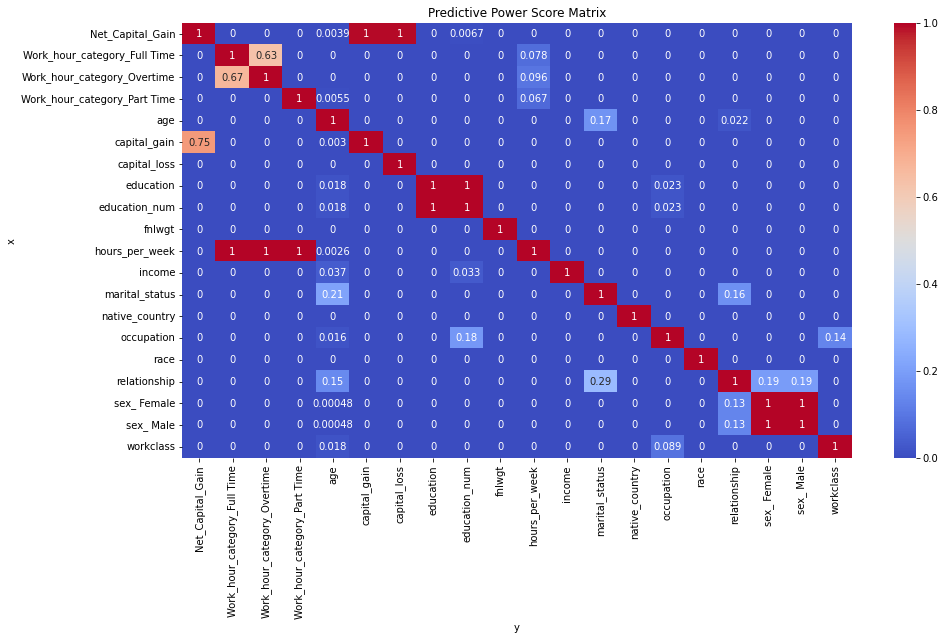

In [40]:
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the PPS matrix
pps_matrix = pps.matrix(data_cleaned)

# Visualize the PPS 
#matrix
plt.figure(figsize=(15,8))
sns.heatmap(pps_matrix.pivot(index='x', columns='y',values='ppscore'), annot=True, cmap='coolwarm')
plt.title('Predictive Power Score Matrix')
plt.show()

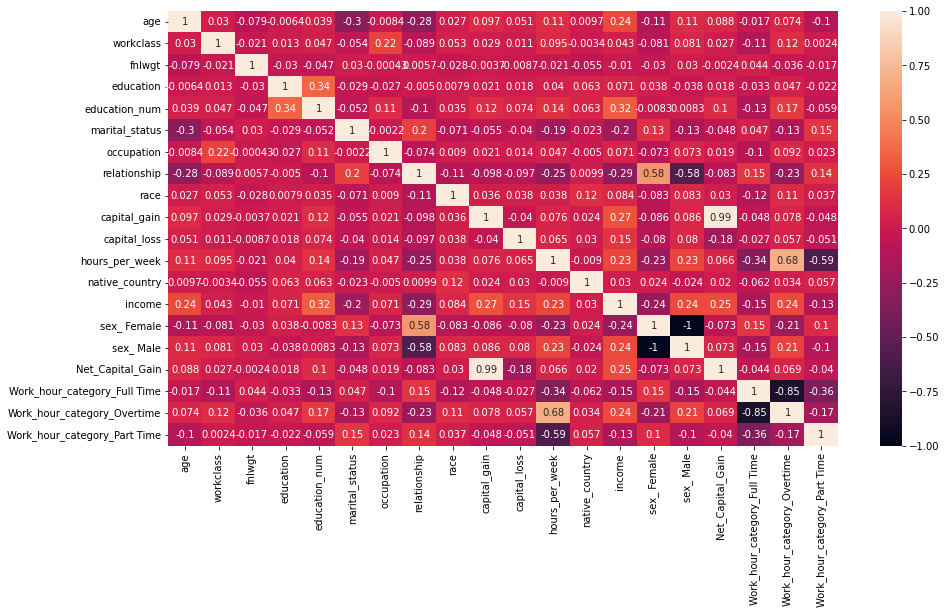

In [41]:
z=data_cleaned.corr()

plt.figure(figsize=(15,8))
sns.heatmap(z,annot=True)
plt.show()

# PPS vs. Correlation:
PPS provides a more comprehensive measure of feature relationships, capturing non-linear dependencies and handling mixed data types.
Correlation is limited to linear relationships and numerical data but is computationally simpler.